In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


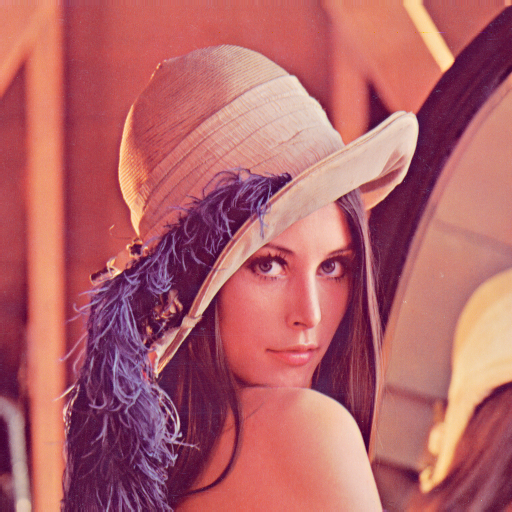

In [ ]:
import numpy as np
from PIL import Image
# display image in colab
image_colored = Image.open ("/content/drive/MyDrive/ML and AI/Lenna_(test_image).png")
display ( image_colored )

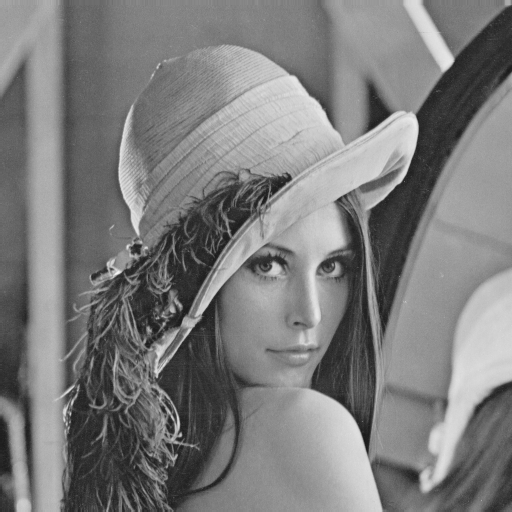

In [ ]:
image_grayed = image_colored.convert ("L")
display(image_grayed)

In [ ]:
display ( " Image Format : " , image_grayed . format )
display ( " Image Size : " , image_grayed . size )
display ( " Image Mode : " , image_grayed . mode )

' Image Format : '

None

' Image Size : '

(512, 512)

' Image Mode : '

'L'

In [ ]:
# Get the size (width , height ) and channels (RGB)
width , height = image_colored . size
channels = len( image_colored . getbands () )
display( f" Image shape (RGB): ({ height } , { width } , { channels})")
image_size_colored = width * height *3
display ( f" Image size (RGB): { image_size_colored }")

' Image shape (RGB): (512 , 512 , 3)'

' Image size (RGB): 786432'

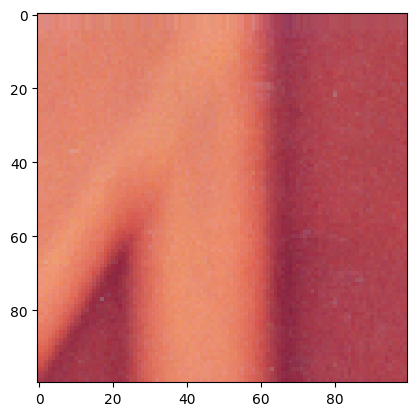

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
image_colored = Image.open("/content/drive/MyDrive/ML and AI/Lenna_(test_image).png")

# Convert the image to a NumPy array
image_array = np.array(image_colored)

# Extract the top-left corner (100x100 pixels)
top_left_corner = image_array[:100, :100, :]

# Display the extracted top-left corner
plt.imshow(top_left_corner)
plt.show()


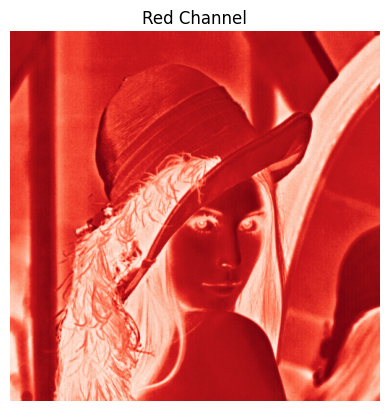

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
image_colored = Image.open("/content/drive/MyDrive/ML and AI/Lenna_(test_image).png")

# Convert the image to a NumPy array
image_array = np.array(image_colored)

# Extract the red channel
red_channel = image_array[:, :, 0]  # Red channel is at index 0 in RGB format

# Display the red channel
plt.imshow(red_channel, cmap="Reds")  # Using Reds colormap for better visualization
plt.title("Red Channel")
plt.axis("off")
plt.show()


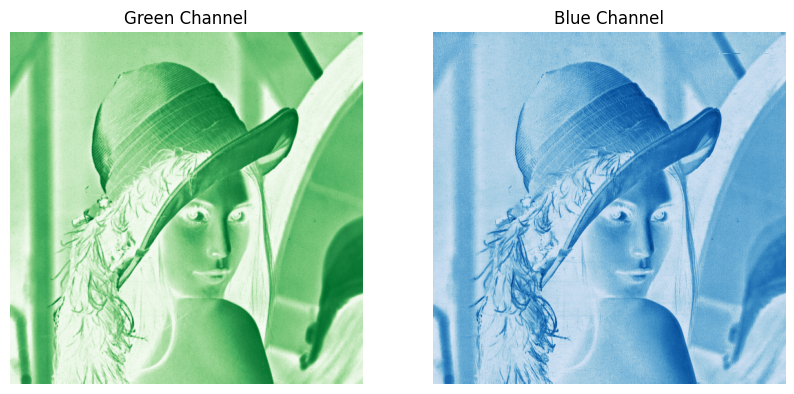

In [ ]:
green_channel = image_array[:, :, 1]  # Green channel is at index 1 in RGB format
blue_channel = image_array[:, :, 2]   # Blue channel is at index 2 in RGB format
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(green_channel, cmap="Greens")  # Displaying in green colormap
ax[0].set_title("Green Channel")
ax[0].axis("off")

ax[1].imshow(blue_channel, cmap="Blues")  # Displaying in blue colormap
ax[1].set_title("Blue Channel")
ax[1].axis("off")

plt.show()

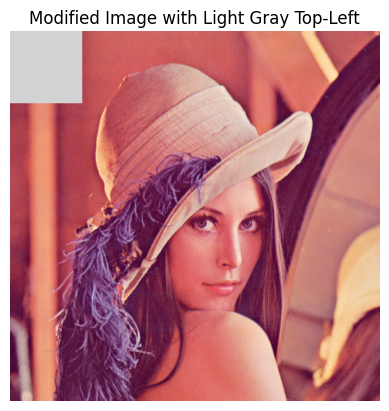

In [ ]:
# Modify the top-left 100x100 pixels to light gray (RGB: 210, 210, 210)
image_array[:100, :100] = [210, 210, 210]  # Setting R, G, B to 210 for a light gray color

# Convert the modified array back to an image
modified_image = Image.fromarray(image_array)

# Display the modified image
plt.imshow(modified_image)
plt.axis("off")  # Hide axis
plt.title("Modified Image with Light Gray Top-Left")
plt.show()

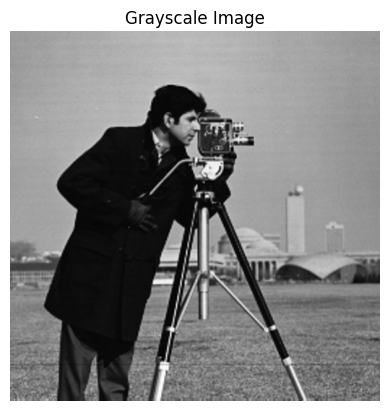

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the grayscale image
image_gray = Image.open("/content/drive/MyDrive/ML and AI/cameraman.png").convert("L")  # Convert to grayscale

# Display the grayscale image
plt.imshow(image_gray, cmap="gray")  # Use 'gray' colormap for proper visualization
plt.axis("off")  # Hide axis
plt.title("Grayscale Image")
plt.show()


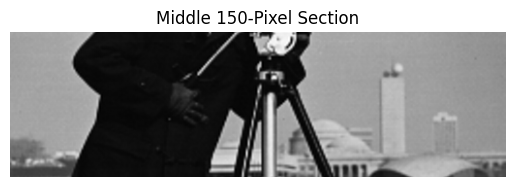

In [ ]:
# Load the grayscale image
image_gray = Image.open("/content/drive/MyDrive/ML and AI/cameraman.png").convert("L")

# Convert the image to a NumPy array
image_array = np.array(image_gray)

# Get the image dimensions
height, width = image_array.shape  # Since it's grayscale, shape has only 2 values (H, W)

# Compute the center and extract a 150-pixel section
start_y = (height - 150) // 2
end_y = start_y + 150

cropped_section = image_array[start_y:end_y, :]  # Extracting the center 150 pixels vertically

# Display the cropped section
plt.imshow(cropped_section, cmap="gray")  # Use 'gray' colormap for proper visualization
plt.axis("off")  # Hide axis
plt.title("Middle 150-Pixel Section")
plt.show()

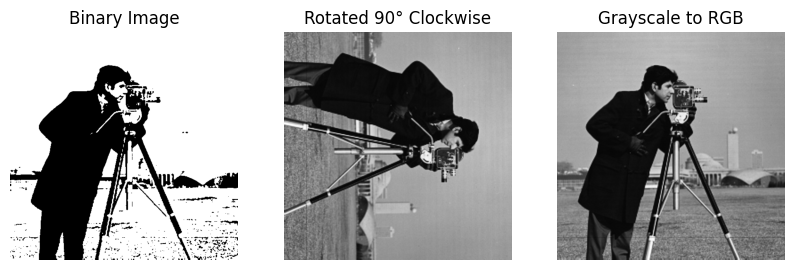

In [ ]:
#  Apply Thresholding
threshold_value = 100
binary_image = np.where(image_array < threshold_value, 0, 255).astype(np.uint8)  # Set pixels <100 to 0, others to 255

# Display the binary image
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.title("Binary Image")

#. Rotate Image 90 Degrees Clockwise #
rotated_image = np.rot90(image_array, k=3)  # Rotate 90° clockwise (3 counter-clockwise)

# Display the rotated image
plt.subplot(1, 3, 2)
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")
plt.title("Rotated 90° Clockwise")

# Convert Grayscale to RGB
rgb_image = np.stack([image_array] * 3, axis=-1)  # Replicate grayscale values across R, G, B

# Display the RGB image
plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Grayscale to RGB")

plt.show()

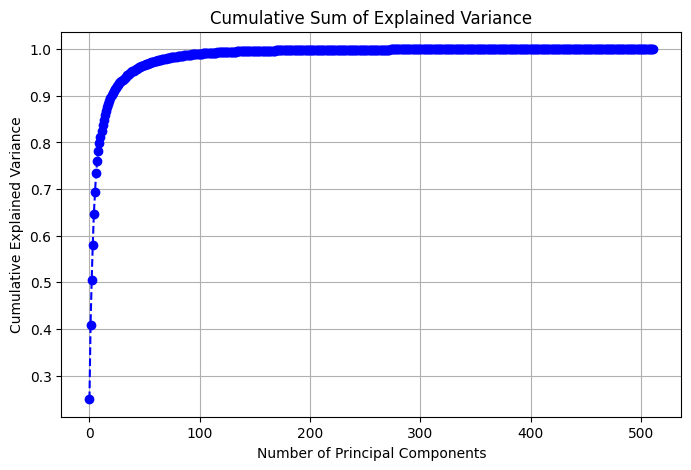

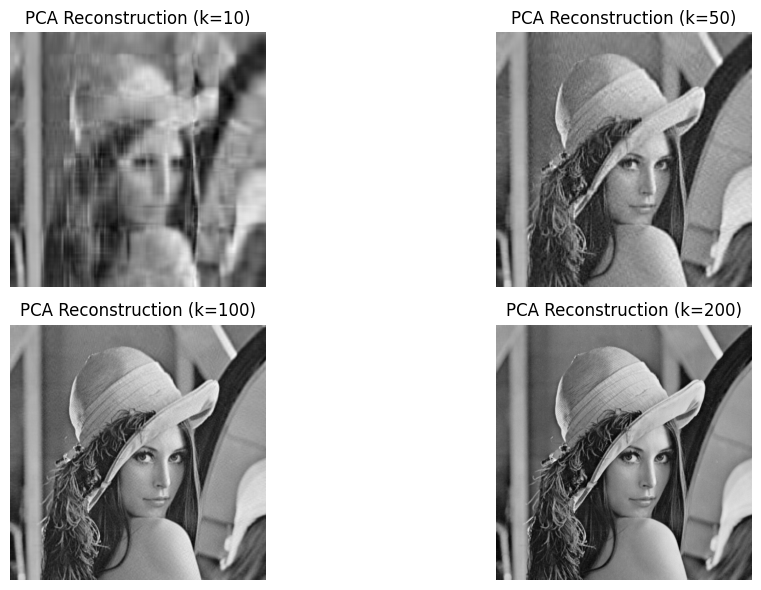

In [ ]:

# Load and convert to grayscale
image_gray = Image.open("/content/drive/MyDrive/ML and AI/lena_gray.gif").convert("L")
image_array = np.array(image_gray, dtype=np.float32)  # Convert to float for PCA

# Standardize Data (Centering)
mean_image = np.mean(image_array, axis=0)  # Compute mean
standardized_data = image_array - mean_image  # Center the data

# Compute Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

#Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Compute eigenvalues & eigenvectors

#  Sort Eigenvalues in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices for sorted eigenvalues (descending)
eigenvalues = eigenvalues[sorted_indices]  # Sort eigenvalues
eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors

#  Identify Principal Components using Cumulative Variance Plot
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Sum of Explained Variance")
plt.grid()
plt.show()

# Experiment with 4 Different PCA Reconstructions
components_list = [10, 50, 100, 200]  # Different numbers of PCs

plt.figure(figsize=(12, 6))
for i, k in enumerate(components_list):
    # Select top k eigenvectors
    top_eigenvectors = eigenvectors[:, :k]

    # Transform data to lower dimension
    reduced_data = np.dot(standardized_data, top_eigenvectors)

    # Reconstruct Image
    reconstructed_image = np.dot(reduced_data, top_eigenvectors.T) + mean_image

    # Display results
    plt.subplot(2, 2, i + 1)
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"PCA Reconstruction (k={k})")
    plt.axis("off")

plt.tight_layout()
plt.show()
